# Neural network

<h3> Import all the required libraries </h3>

In [1]:
#importing reqired lib's
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
#reading csv file
df=pd.read_csv('gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
df.shape

(15039, 11)

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

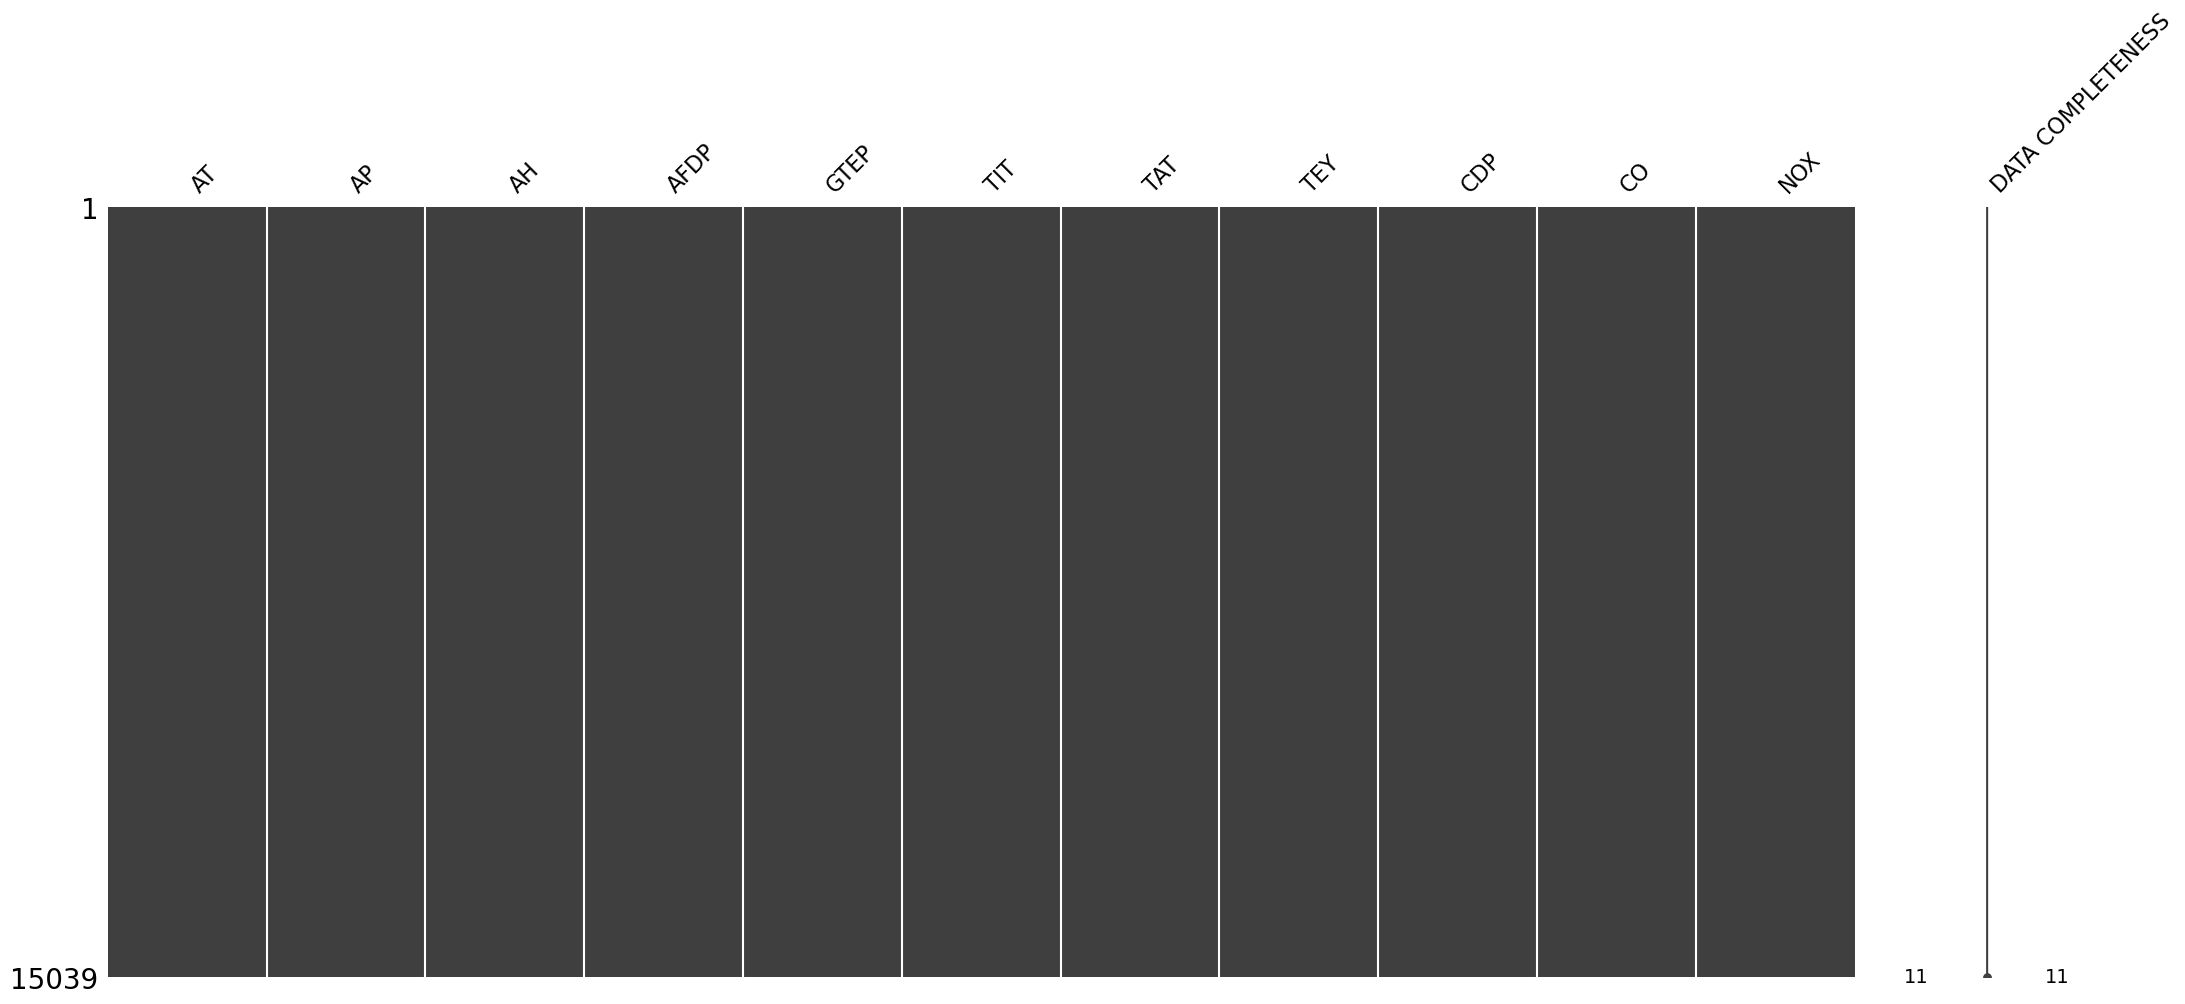

In [4]:
#finding null values
import missingno as msno

msno.matrix(df, labels=True, sort="descending");
df.isnull().sum()

In [6]:
#different datatypes in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


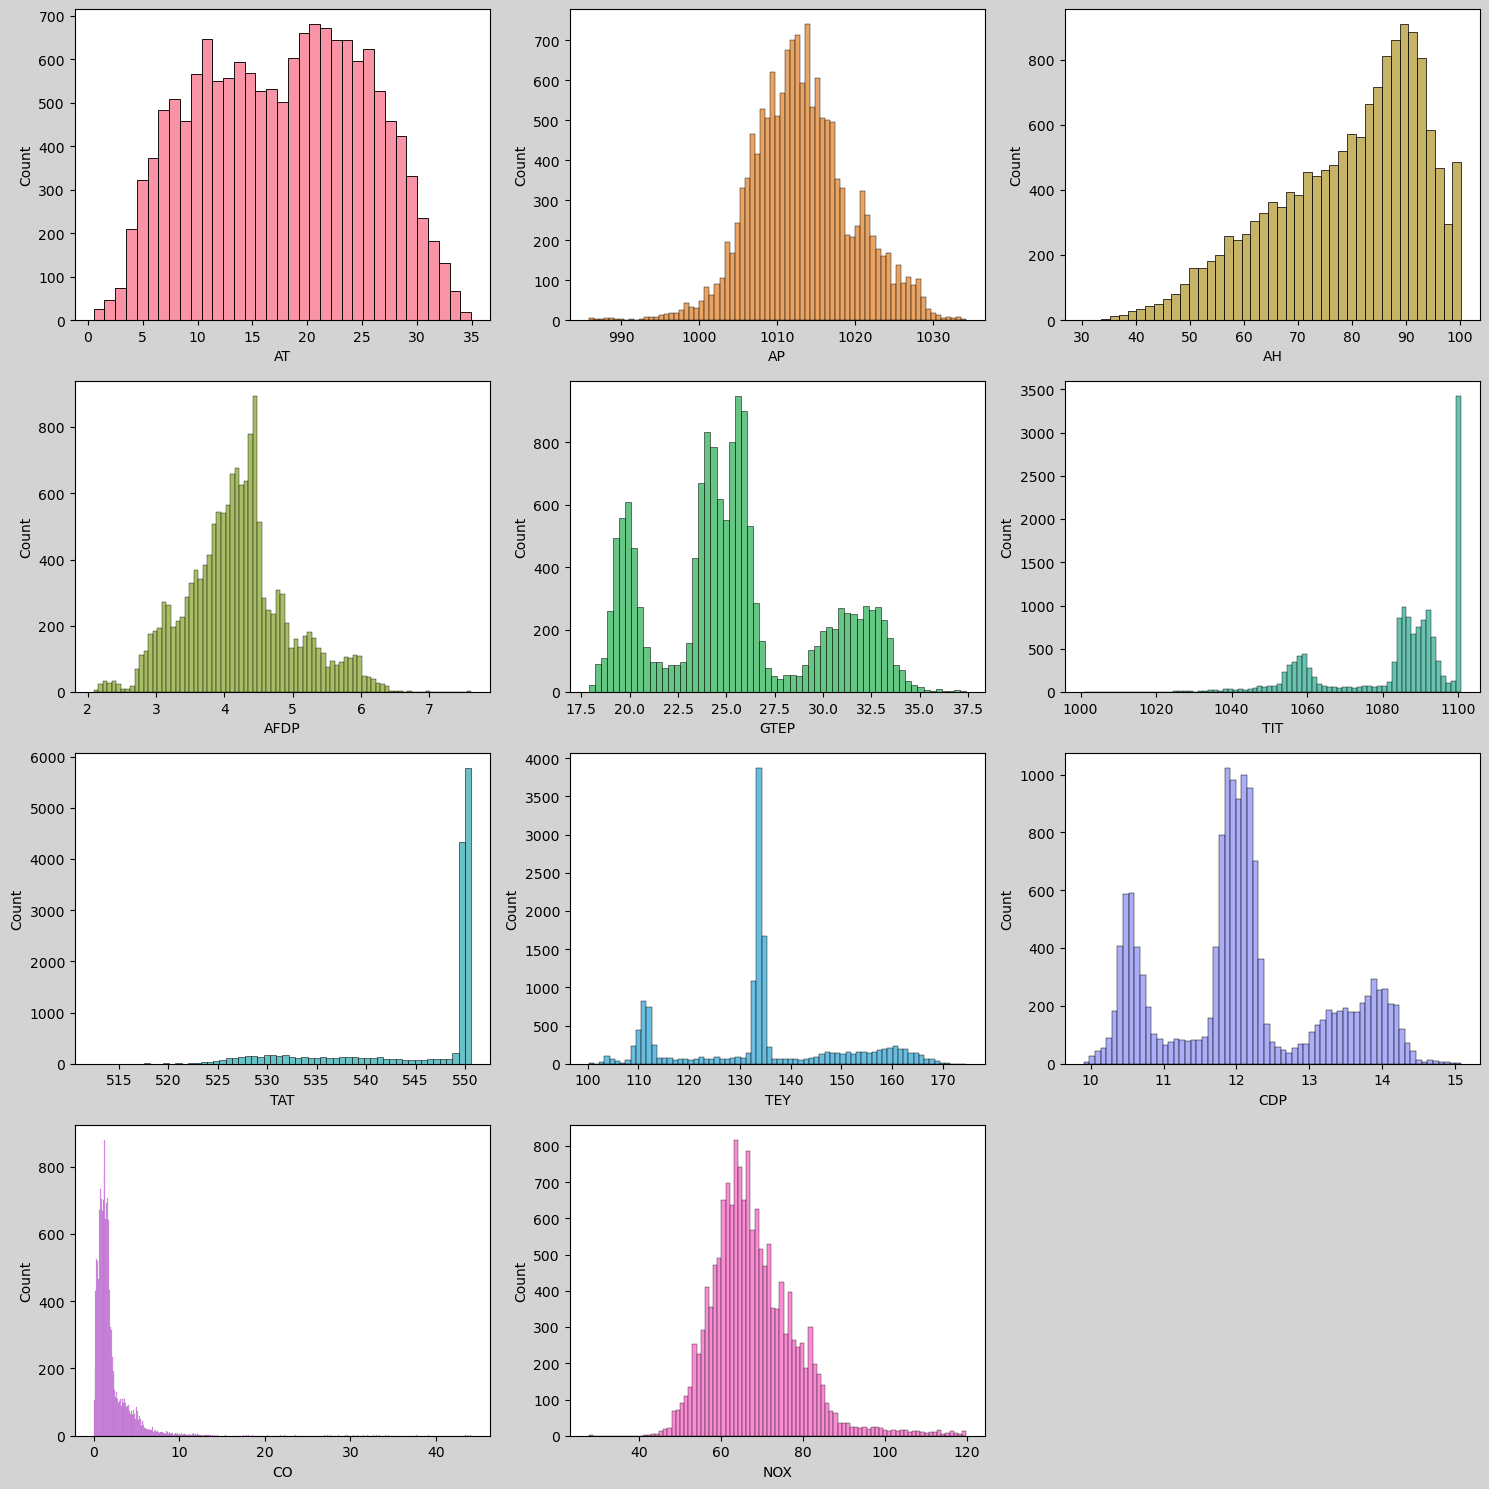

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

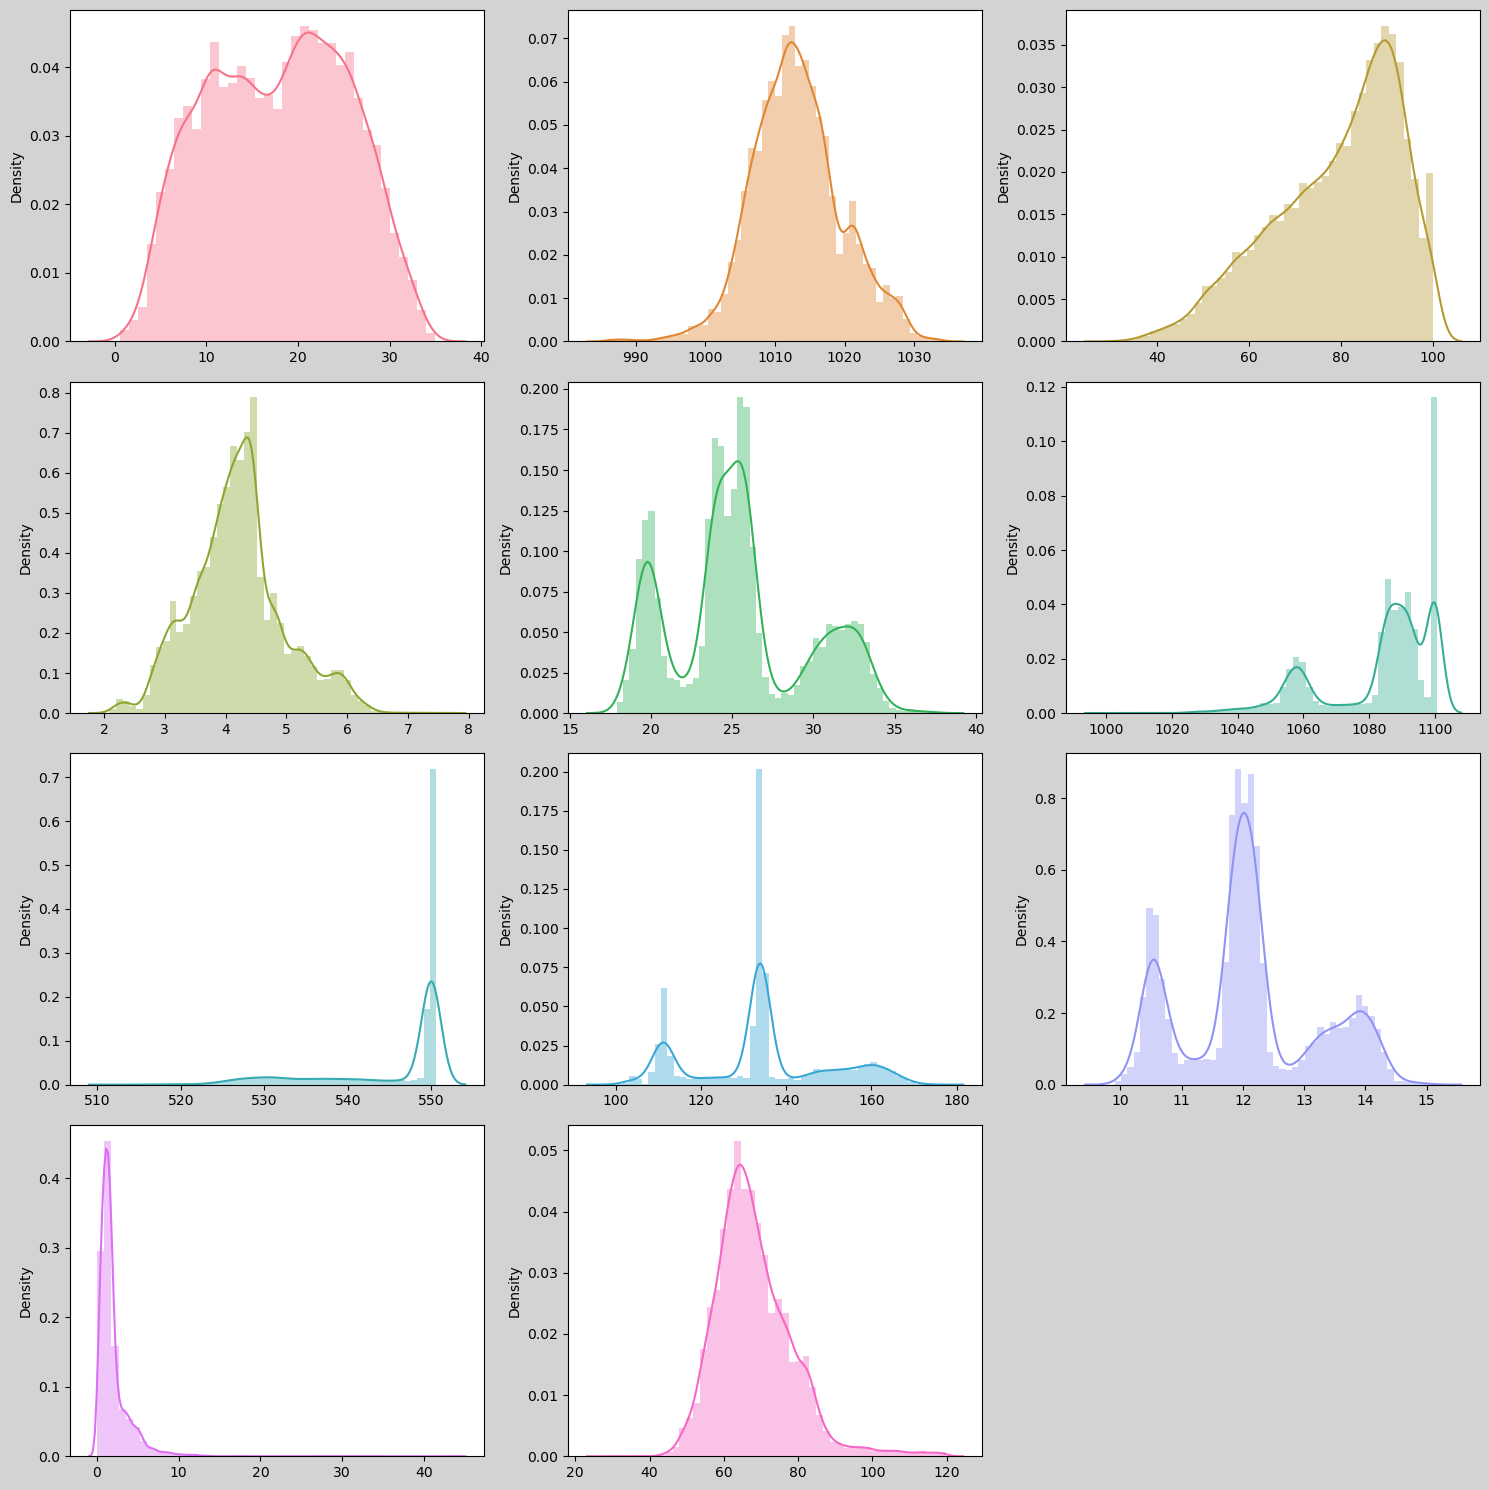

In [9]:
#performing univerent analysis
import warnings
warnings.filterwarnings('ignore')
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

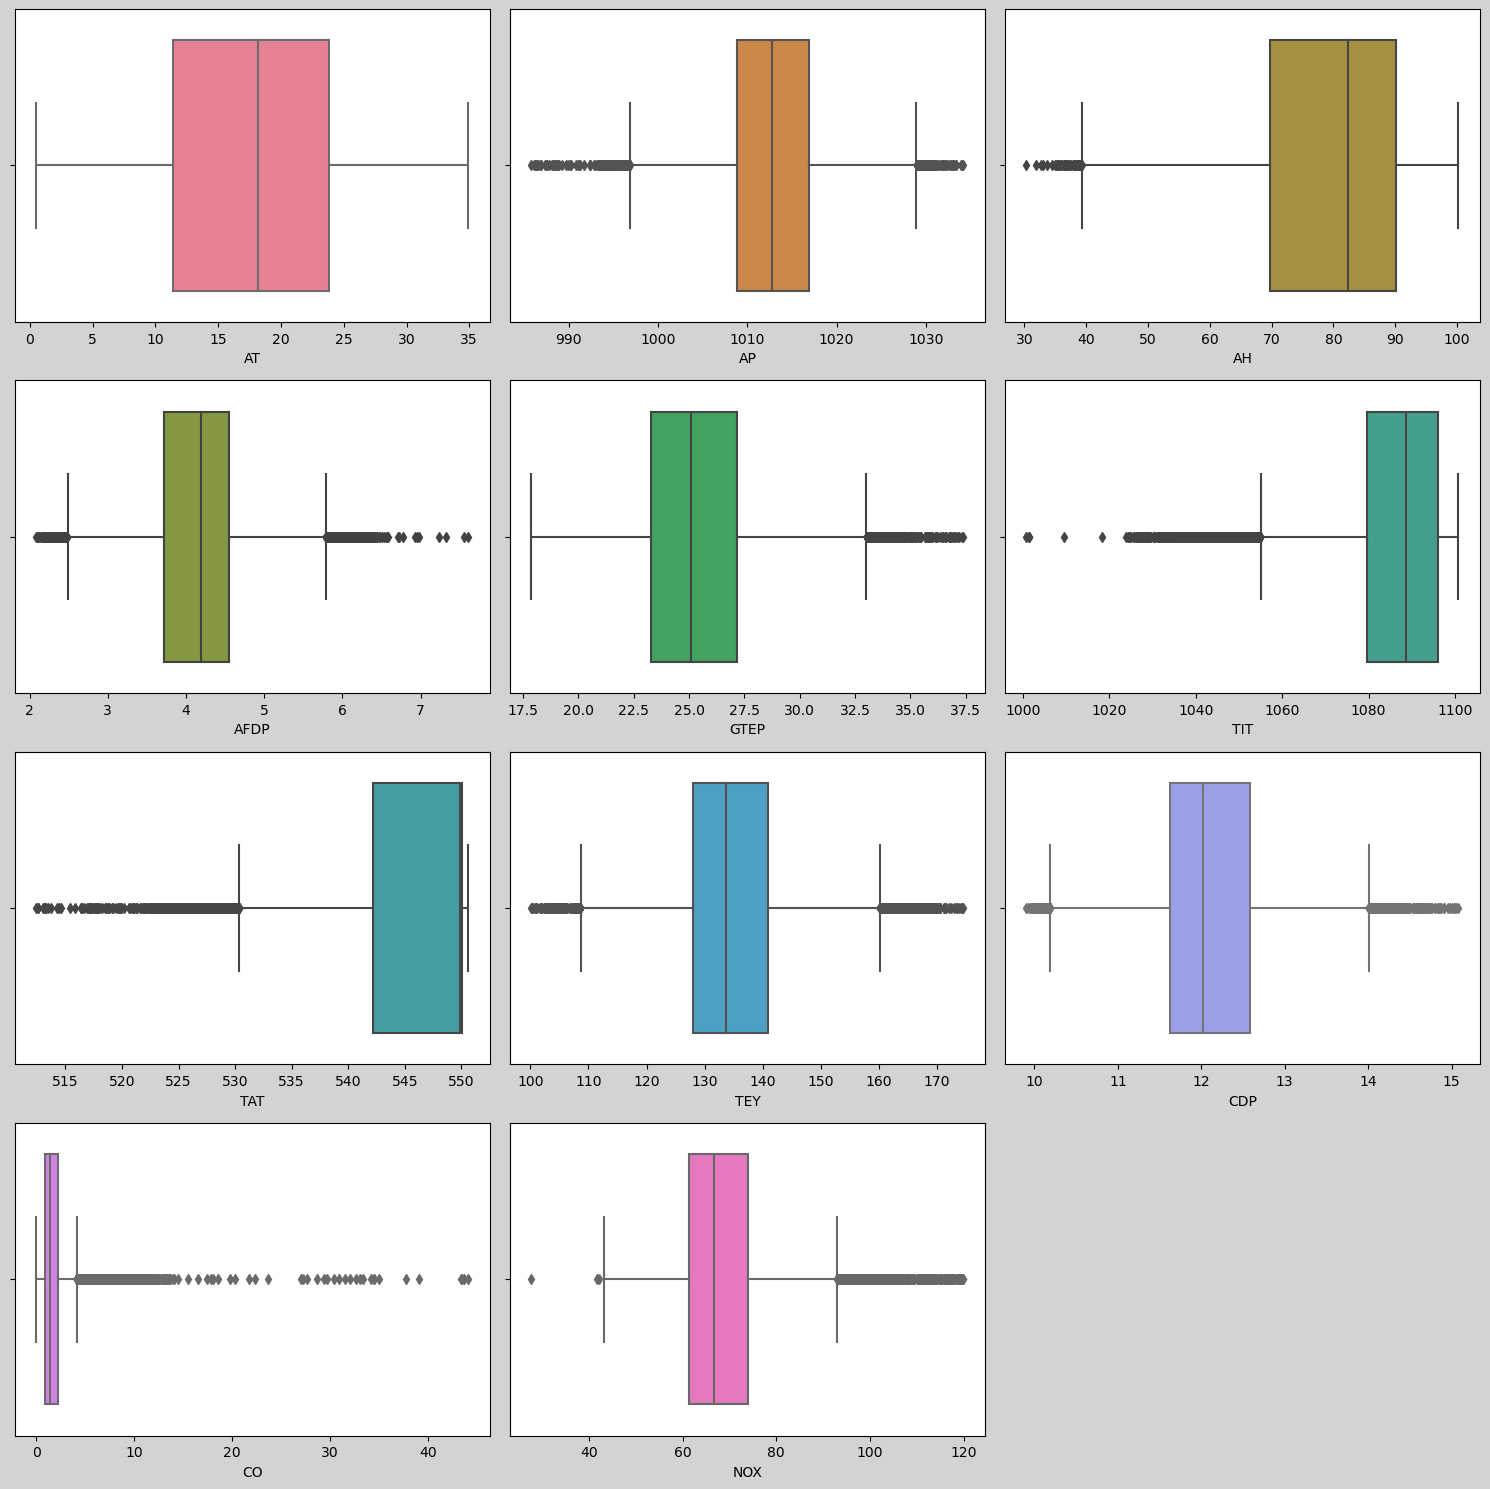

In [10]:
#performing univerent analysis
c=3
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


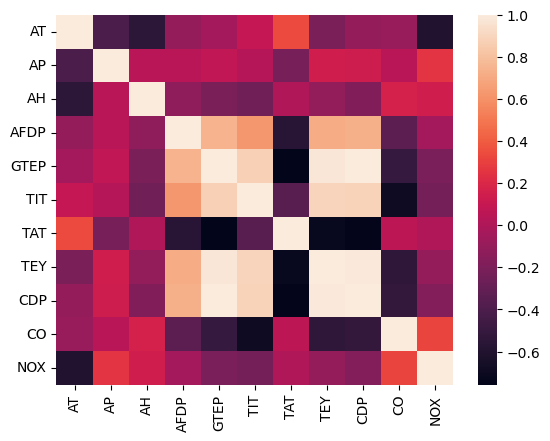

In [11]:
sns.heatmap(df.corr())
df.corr()

In [12]:
#importing scaler
from sklearn.preprocessing import MinMaxScaler
#scaling the parameters
scale=MinMaxScaler().fit_transform(df.iloc[:,[0,1,2,3,4,5,6,8,9,10]])

In [13]:
#spliting the data
x=scale
y=df.iloc[:,7]

#spliting into train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.3)


In [16]:
#Checking the size of train datasets
X_train.shape

(10527, 10)

In [17]:
#Checking the null and dtypes values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [18]:
#Describing the values like mean,std,min,max,etc.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [28]:
#Creating the model 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential([Dense(20, input_dim=10, activation='relu'),Dense(10,  activation='relu'),Dense(1)])
adam=Adam(learning_rate=0.01)
model.compile(loss= 'mean_squared_error', optimizer=adam)
model.fit(X_train,y_train,batch_size=10,epochs=50,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))



Epoch 1/50
1053/1053 [==============================] - 5s 4ms/step - loss: 623.7147 - val_loss: 20.9792
Epoch 2/50
1053/1053 [==============================] - 4s 3ms/step - loss: 14.7507 - val_loss: 10.4159
Epoch 3/50
1053/1053 [==============================] - 3s 3ms/step - loss: 5.9811 - val_loss: 2.8256
Epoch 4/50
1053/1053 [==============================] - 3s 3ms/step - loss: 1.3811 - val_loss: 0.8555
Epoch 5/50
1053/1053 [==============================] - 4s 3ms/step - loss: 1.1651 - val_loss: 1.5778
Epoch 6/50
1053/1053 [==============================] - 3s 3ms/step - loss: 1.2091 - val_loss: 1.4981
Epoch 7/50
1053/1053 [==============================] - 4s 3ms/step - loss: 1.2025 - val_loss: 1.0693
Epoch 8/50
1053/1053 [==============================] - 3s 3ms/step - loss: 1.0792 - val_loss: 1.7900


In [29]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,623.714661,20.979158
1,14.750697,10.415922
2,5.981125,2.825553
3,1.381052,0.855466
4,1.165130,1.577777
5,1.209071,1.498050
6,1.202542,1.069347
7,1.079209,1.789992


In [30]:
#Checking the Accuracy score for Train data

from sklearn.metrics import r2_score
predictions = model.predict(X_train)
r2_score(y_train,predictions)

329/329 [==============================] - 1s 2ms/step


0.9925265406652971

In [31]:
#Checking the Accuracy score for Test data

predictions = model.predict(X_test)
r2_score(y_test,predictions)

141/141 [==============================] - 0s 2ms/step


0.9929408409015547